In [21]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
NEURAL_NETWORKS = [ 'DenseNet201',
                    'MobileNetV2',
                    'InceptionV3', 
                    "ResNet50", 
                    'GradientBoosting', 
                    'KNN', 
                    'NBayes', 
                    "RandomForest",
                    'f_GradientBoosting', 
                    'f_KNN', 
                    'f_NBayes', 
                    "f_RandomForest"]
pre_name = "ml_dl_f"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [30]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)
NEURAL_NETWORKS = main_pd['model'].unique()

In [31]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,DenseNet201,280.643584,21.313709,301.957292,88.970499,89.120725,88.603845,89.507118,87.248936,...,88.133702,89.650129,85.859061,91.924769,77.908019,78.168240,76.256460,79.326965,71.650703,83.932722
1,10,DenseNet201,285.591305,20.736673,306.327978,92.279468,92.424217,91.860193,92.935079,90.247864,...,91.085295,92.136776,89.508074,93.713998,83.225301,83.279902,82.208636,84.141460,79.309401,87.040696
2,15,DenseNet201,252.470955,20.218766,272.689721,94.174657,94.386494,93.465680,94.962670,91.220195,...,92.236672,93.456696,90.406637,95.286731,85.831933,85.782486,84.708303,87.010038,81.255701,90.462640
3,20,DenseNet201,237.816697,19.481501,257.298198,95.789815,95.967811,94.663550,96.930285,91.263448,...,93.452623,94.506344,91.872042,96.086925,88.085852,88.102236,87.068547,89.065021,84.073836,92.059732
4,25,DenseNet201,235.830205,18.751458,254.581663,97.233779,97.551546,96.322472,98.444179,93.139913,...,94.726448,95.380855,93.744837,96.362465,90.034286,90.106604,89.345516,90.792887,87.174460,92.963943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,f_RandomForest,18.388356,0.014800,18.403155,99.668201,100.000000,99.175362,100.000000,97.938405,...,84.848485,93.103448,72.466040,105.485893,81.518687,80.720735,76.709295,86.859904,61.483382,102.085817
16,85,f_RandomForest,17.920158,0.011339,17.931497,99.593403,100.000000,99.141703,100.000000,97.854258,...,84.848485,90.696022,76.077178,99.467329,81.328606,80.720735,76.321364,86.859904,60.513555,102.667713
17,90,f_RandomForest,18.542379,0.011224,18.553603,99.570009,99.983171,99.124874,100.000000,97.812184,...,83.870967,90.696022,73.633385,100.933605,79.935708,80.178373,73.994007,86.666667,54.985018,105.675656
18,95,f_RandomForest,20.662662,0.016659,20.679321,99.693368,100.000000,99.158532,100.000000,97.896331,...,85.182709,93.103448,73.301601,104.984556,80.391543,82.050202,76.243351,86.666667,60.608378,102.301640


In [32]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

57.692307692307686

In [33]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None, legend_per_row=4):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).
    :param legend_per_row: Número de legendas por linha na legenda.

    obs:
    300+ dpi, 16px font, export to pdf and plot
    """
    
    # Definir os grupos e suas cores (mesmo esquema de cores usado no boxplot)
    color_map = {
        'GradientBoosting': '#1f77b4',  # Azul
        'InceptionV3': '#1f77b4',      # Azul
        'MobileNetV2': '#1f77b4',      # Azul
        'DenseNet201': '#ff7f0e',      # Laranja
        'ResNet50': '#ff7f0e',         # Laranja
        'KNN': '#ff7f0e',              # Laranja
        'RandomForest': '#ff7f0e',     # Laranja
        'NBayes': '#ff7f0e',           # Laranja
        'f_KNN': '#2ca02c',             # Verde
        'f_NBayes': '#2ca02c',          # Verde
        'f_RandomForest': '#2ca02c',    # Verde
        'f_GradientBoosting': '#2ca02c' # Verde
    }

    # Definir marcadores
    markers = ['o', 's', '^', 'v', 'x', '+', 'D', 'P', '*', '<', '>', 'H', 'd']
    marker_iter = iter(markers)

    # Configurar figura
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    
    # Iterar sobre as redes (NEURAL_NETWORKS) e plotar os dados com as cores dos grupos
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        marker = next(marker_iter)
        ax.plot(x, y, label=network, marker=marker, linestyle='-', linewidth=4, markersize=10, color=color_map[network])

    # Configurações de título, eixos e ticks
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(attribute.replace('_', ' ').capitalize(), fontsize=14)
    ax.set_xticks(xticks)
    
    # Configuração opcional dos yticks
    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        # Adicionar automaticamente 10 intervalos no eixo Y com valores arredondados
        min_value = main_pd[attribute].min()
        max_value = main_pd[attribute].max()
        step = (max_value - min_value) / 10
        ax.set_yticks(np.round(np.arange(min_value, max_value + step, step), 2))

    # Legenda personalizada
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='small', 
              title_fontsize='small', ncol=legend_per_row)

    # Ajustar as margens para utilizar mais área do gráfico
    plt.subplots_adjust(top=0.92, bottom=0.2, left=0.1, right=0.95)  # Ajuste das margens

    # Verifica se a pasta de gráficos existe, senão cria
    graphics_path = results_path / 'analitycs' / 'by_train' / 'graphics'
    if not os.path.exists(graphics_path):
        os.makedirs(graphics_path)
    
    # Exportar gráfico para PDF
    plt.savefig(graphics_path / f"{pre_name}_{attribute}.pdf", format='pdf', dpi=500, bbox_inches='tight', pad_inches=0.1)
    plt.show()


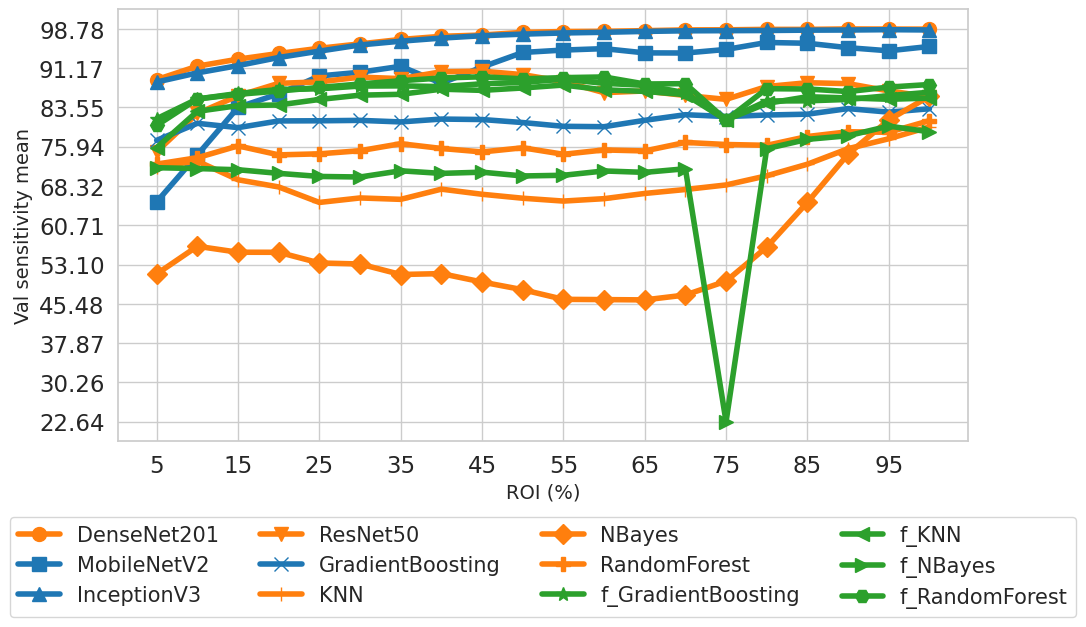

In [46]:
plot_comparison(main_pd, 'val_sensitivity_mean', '', 'ROI (%)', range_rois)

KeyError: 'f_GradientBoosting'

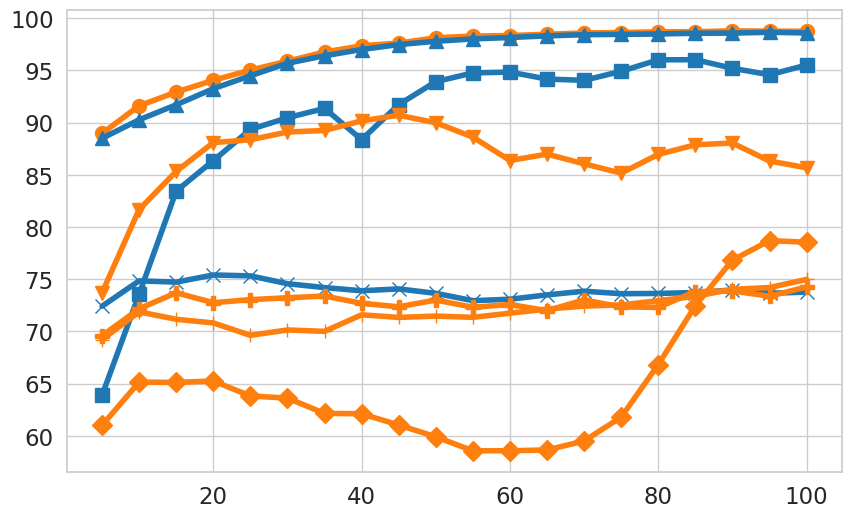

In [36]:
plot_comparison(main_pd, 'val_f1_score_mean', '', 'ROI (%)', range_rois)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

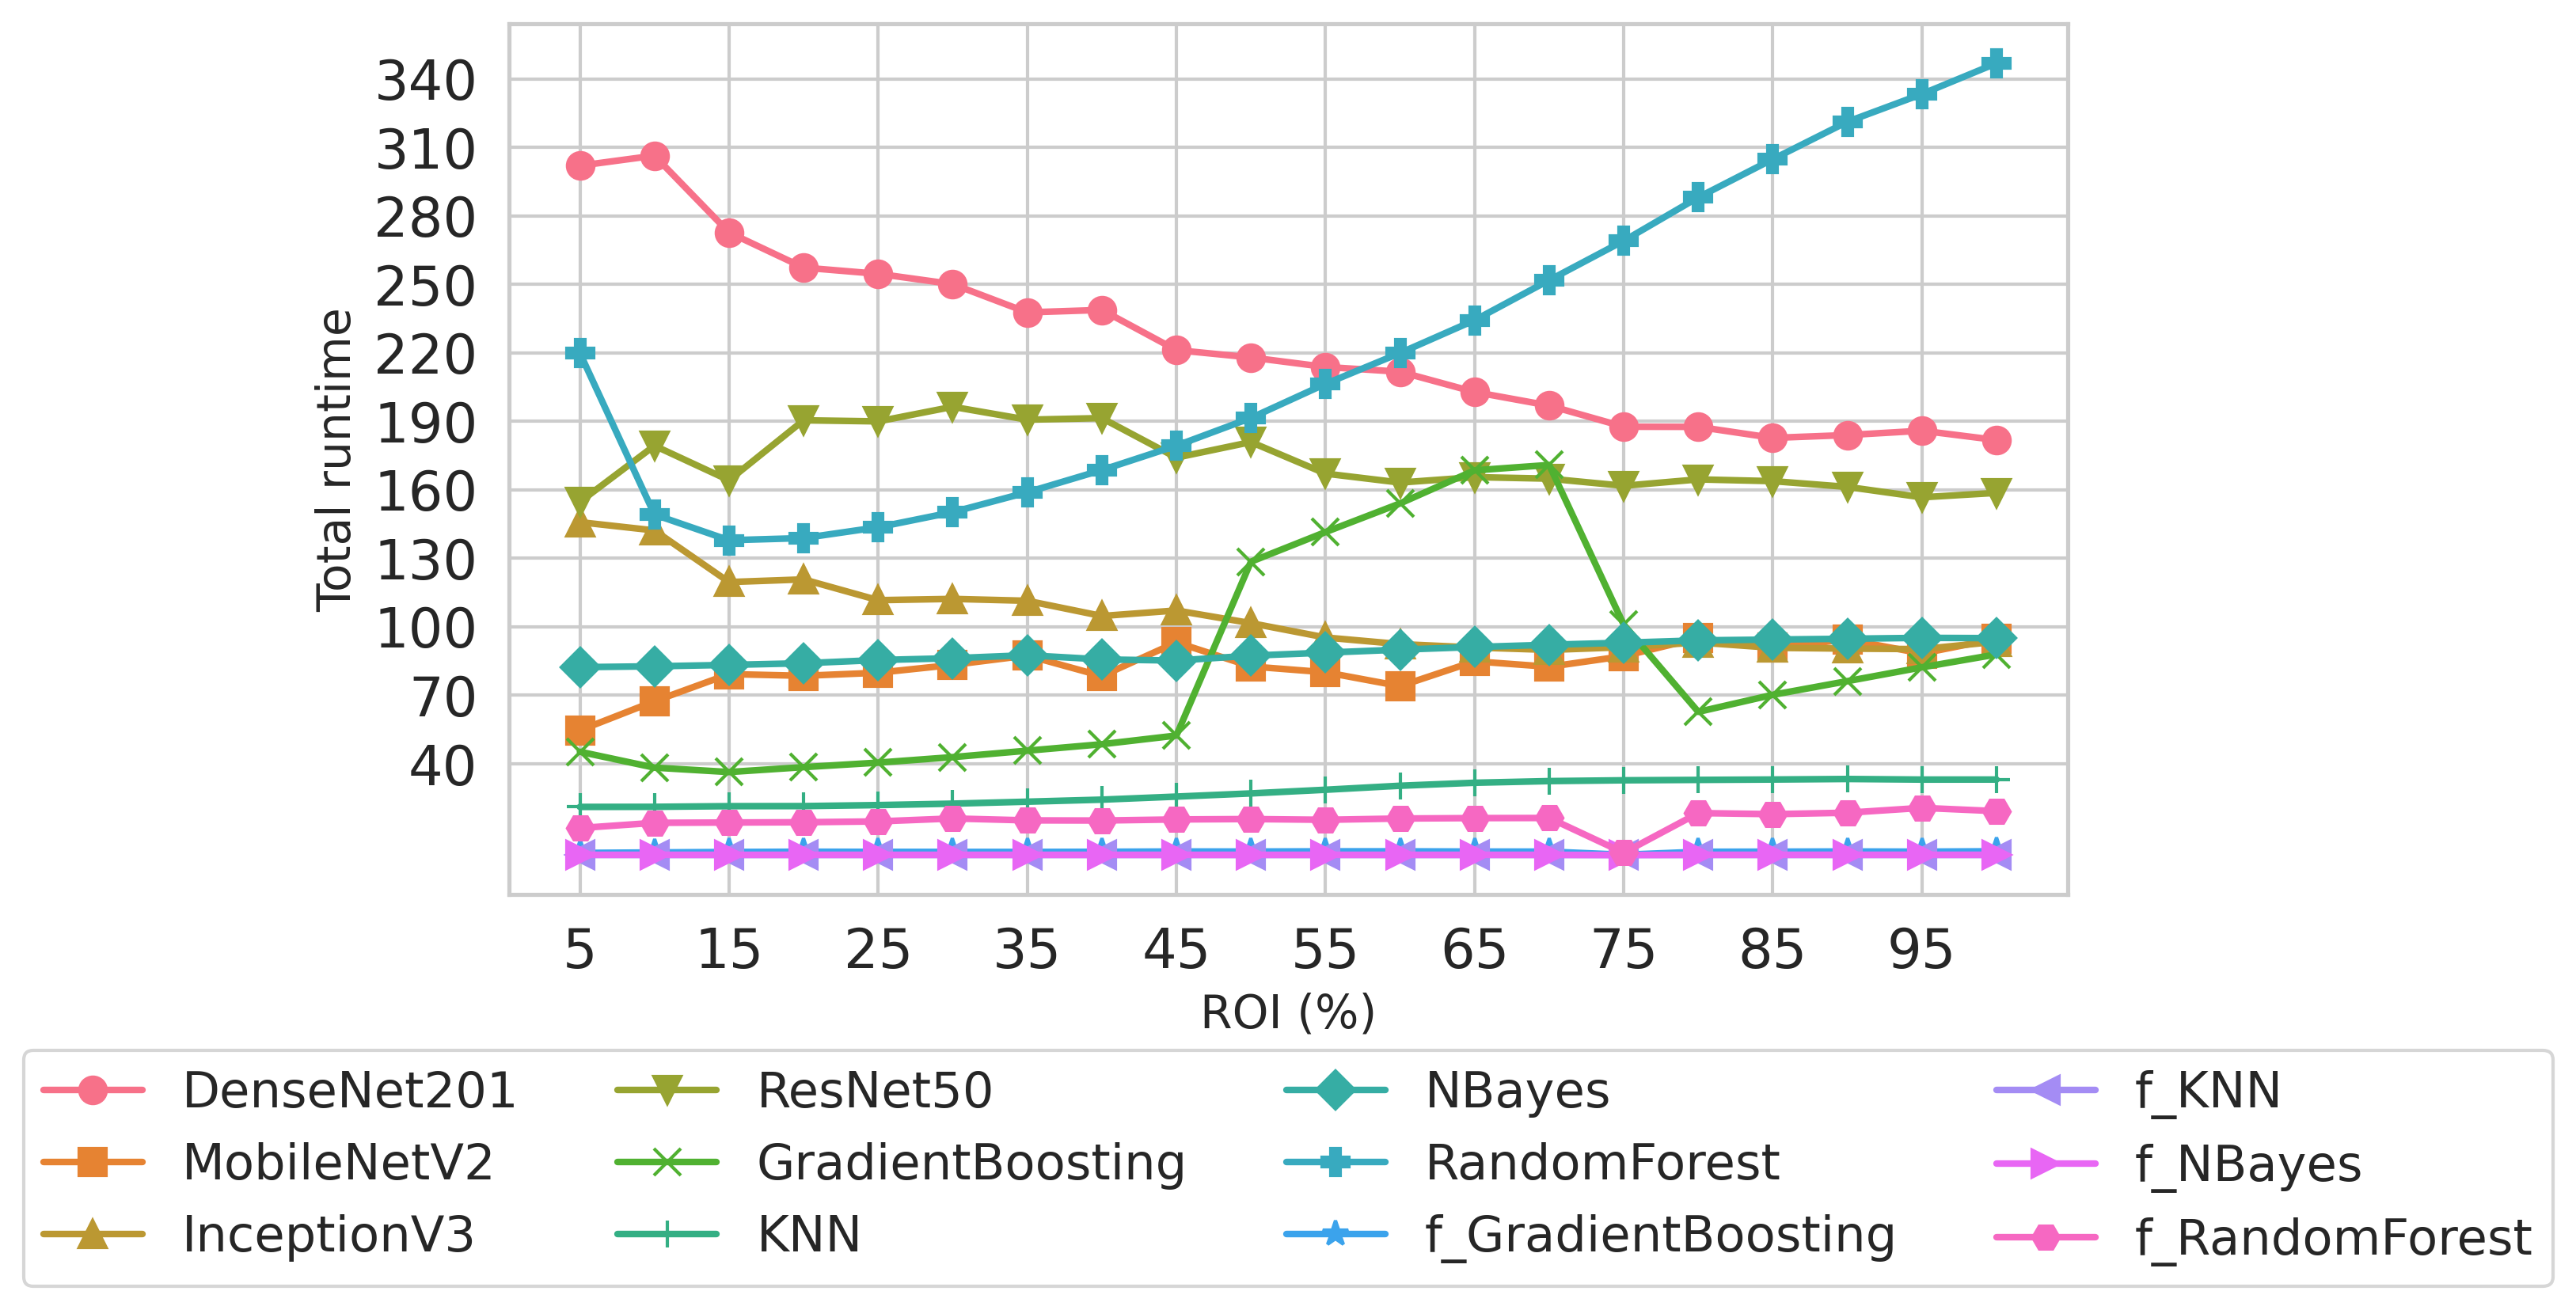

In [11]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', '', 'ROI (%)', range_rois, yticks=range_time)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

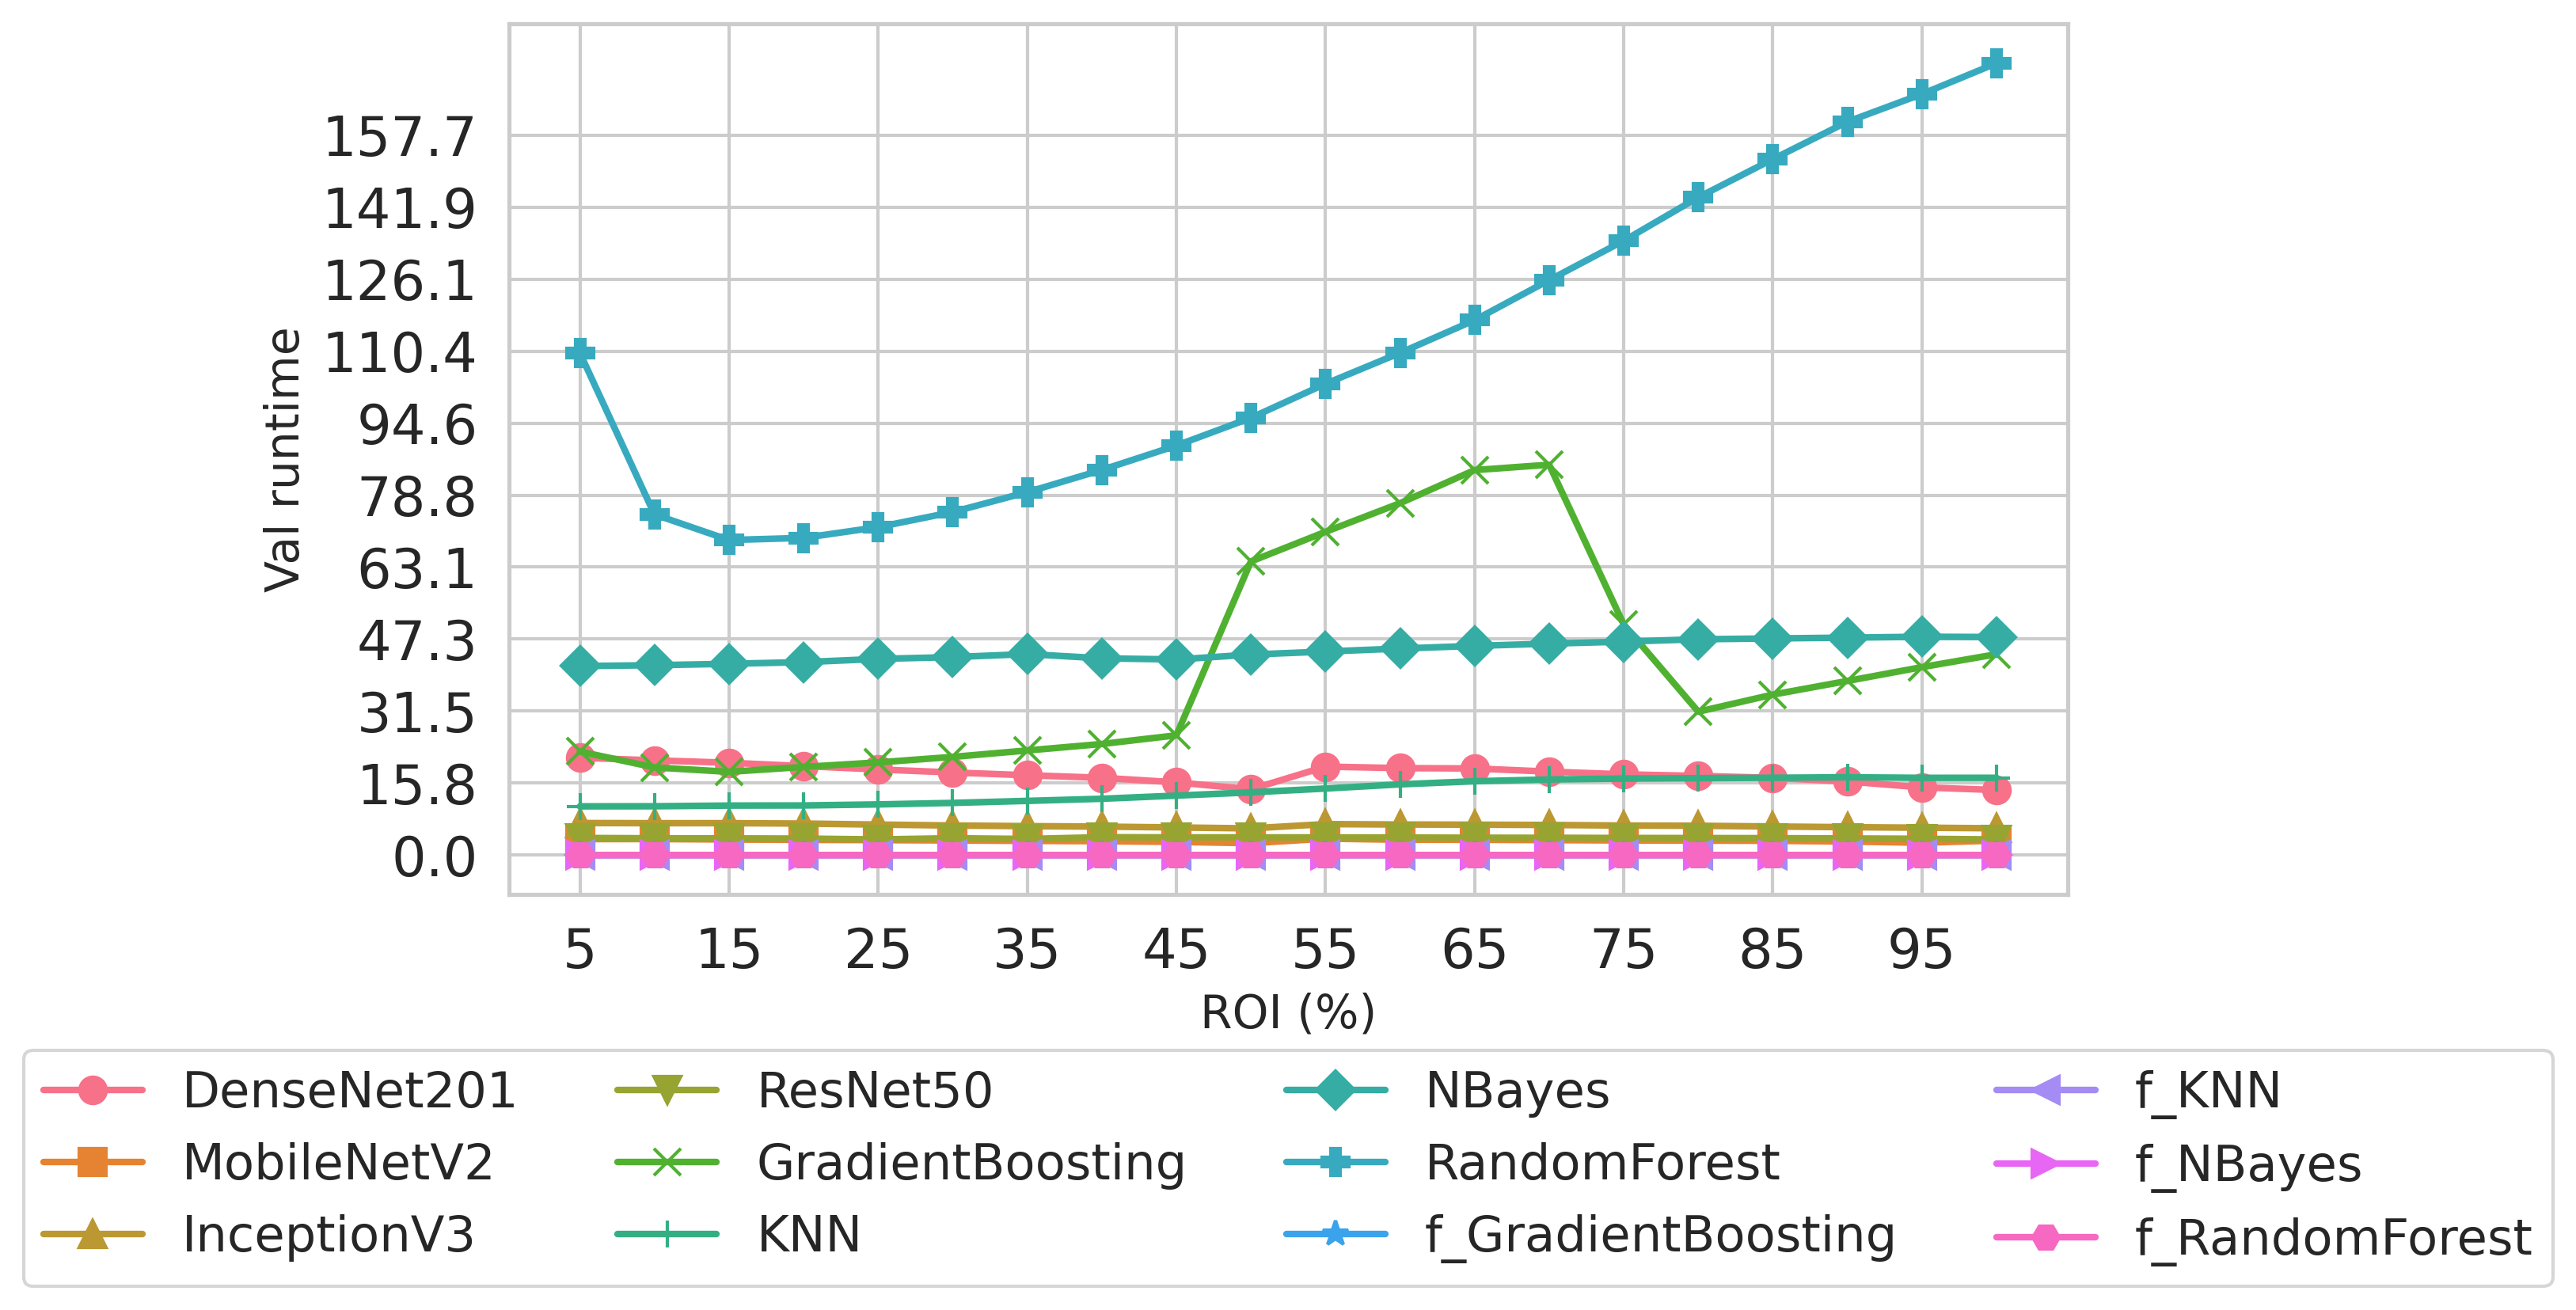

In [12]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação

# get min and max values for validation time
max_val_time = main_pd['val_runtime'].max()
min_val_time = main_pd['val_runtime'].min()
# de forma que fique sejam 11 valores
step = (max_val_time - min_val_time) / 11
range_time_validation = np.arange(min_val_time, max_val_time, step)

plot_comparison(main_pd, 'val_runtime', '', 'ROI (%)', range_rois, yticks=range_time_validation)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

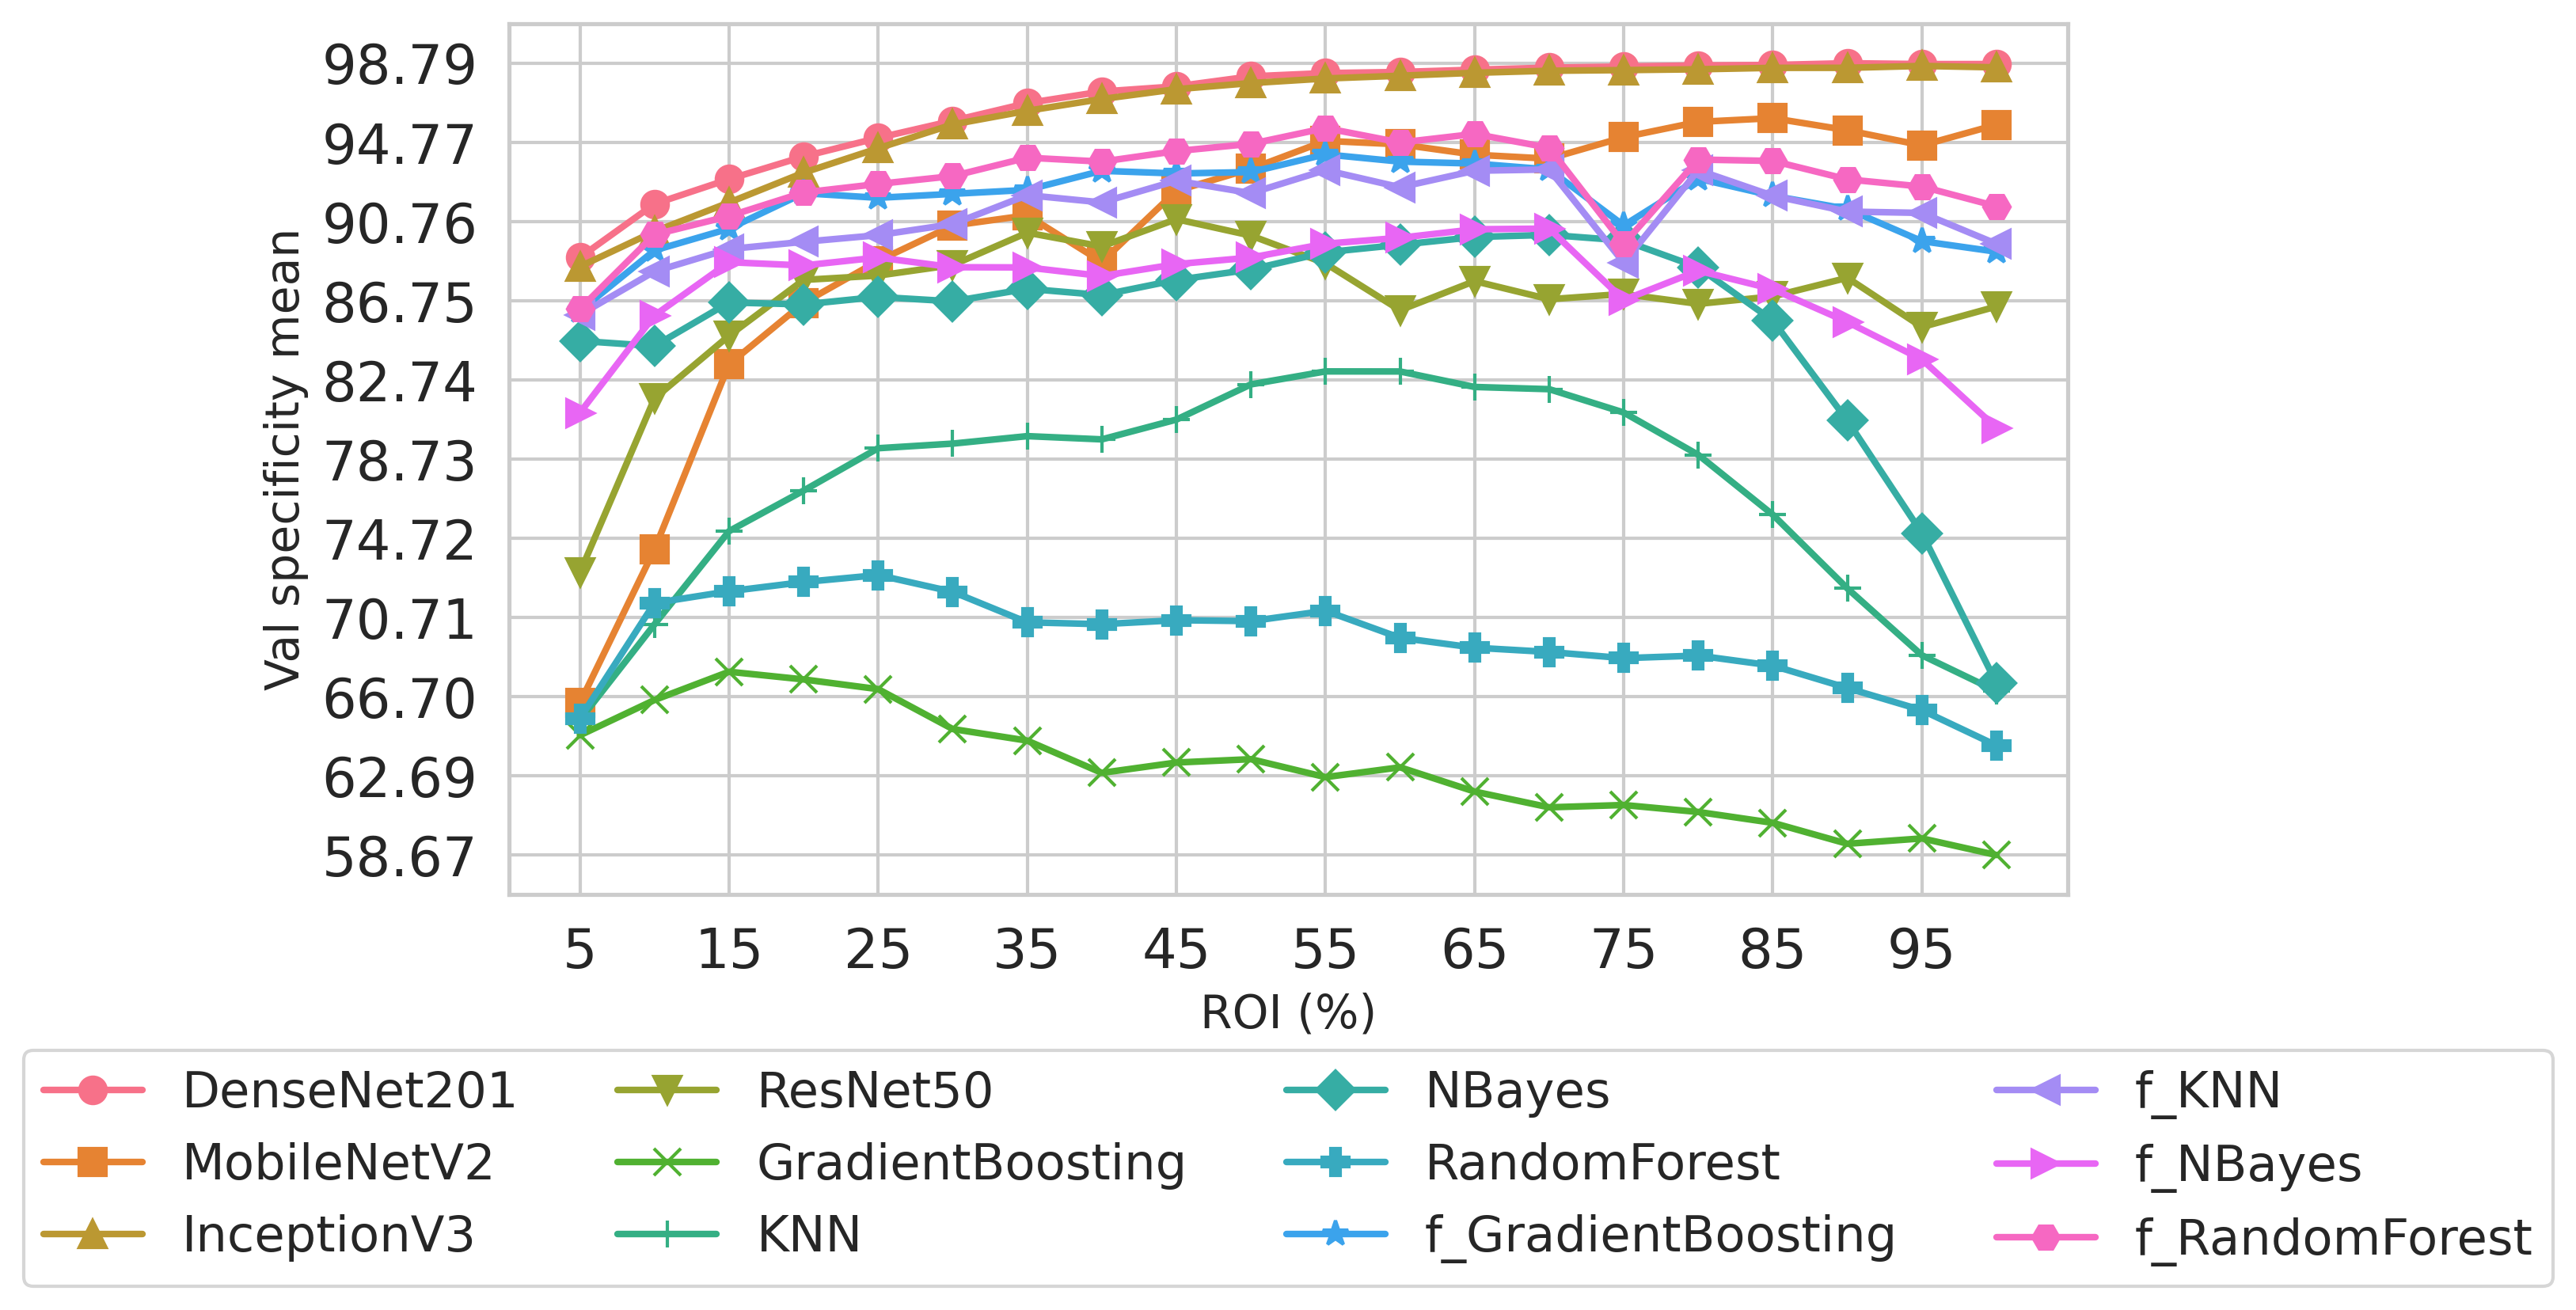

In [13]:

plot_comparison(main_pd, 'val_specificity_mean', '', 'ROI (%)', range_rois)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

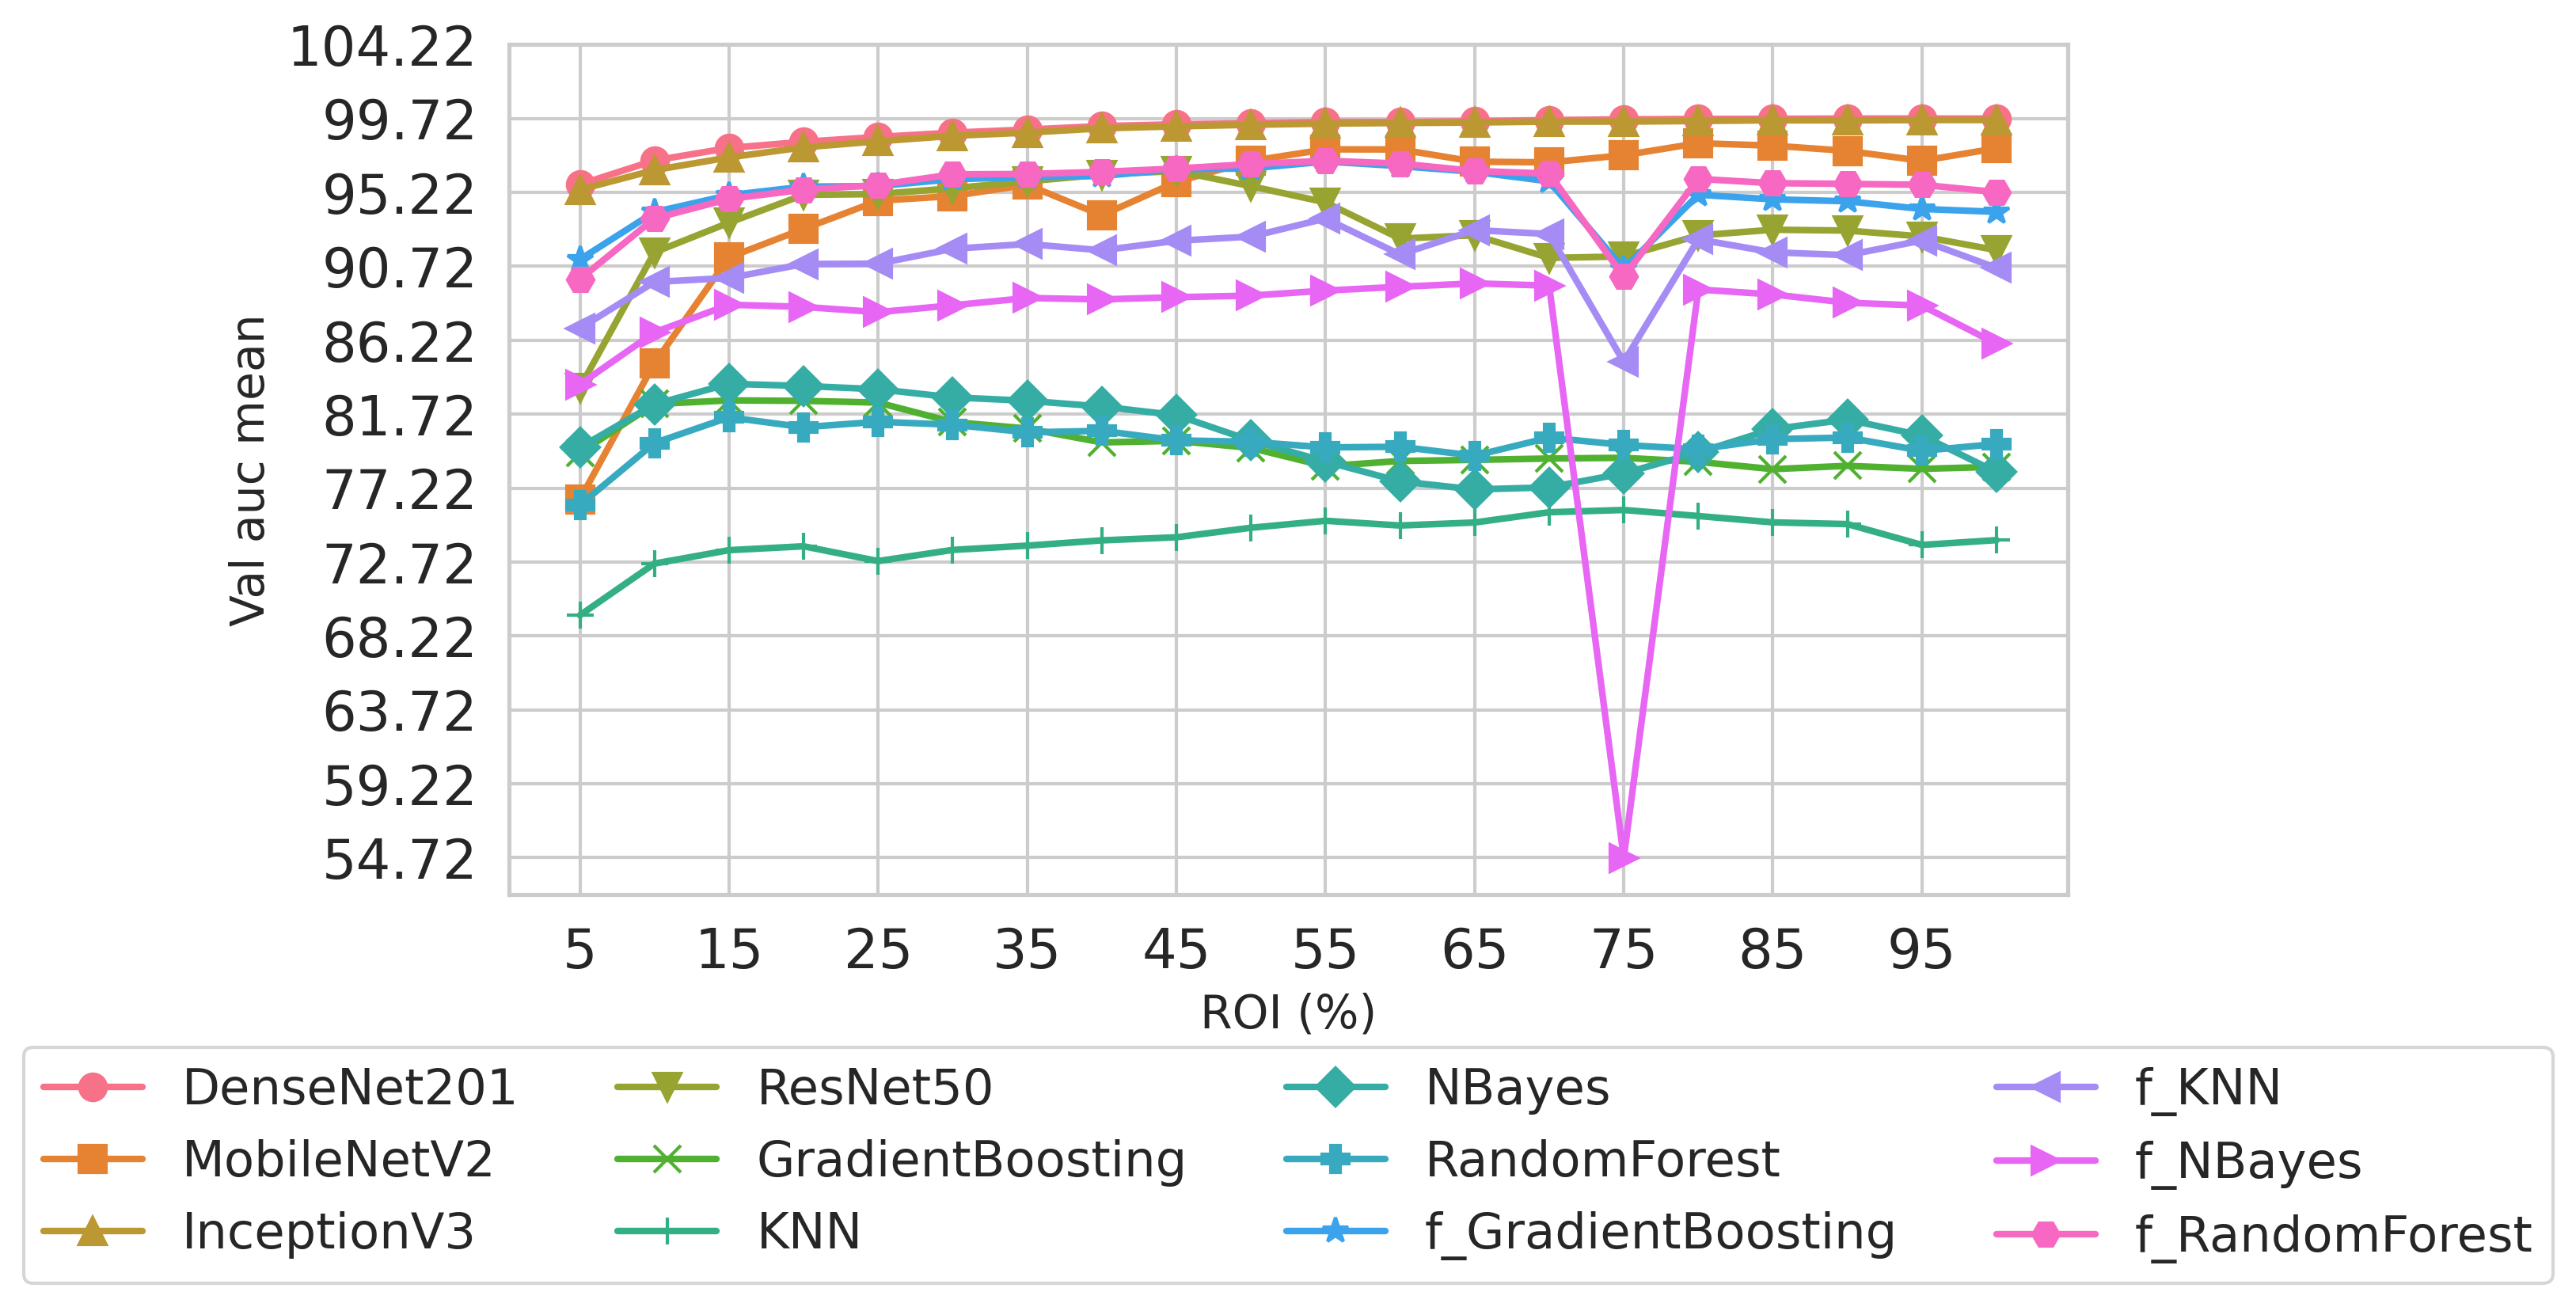

In [14]:
plot_comparison(main_pd, 'val_auc_mean', '', 'ROI (%)', range_rois)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

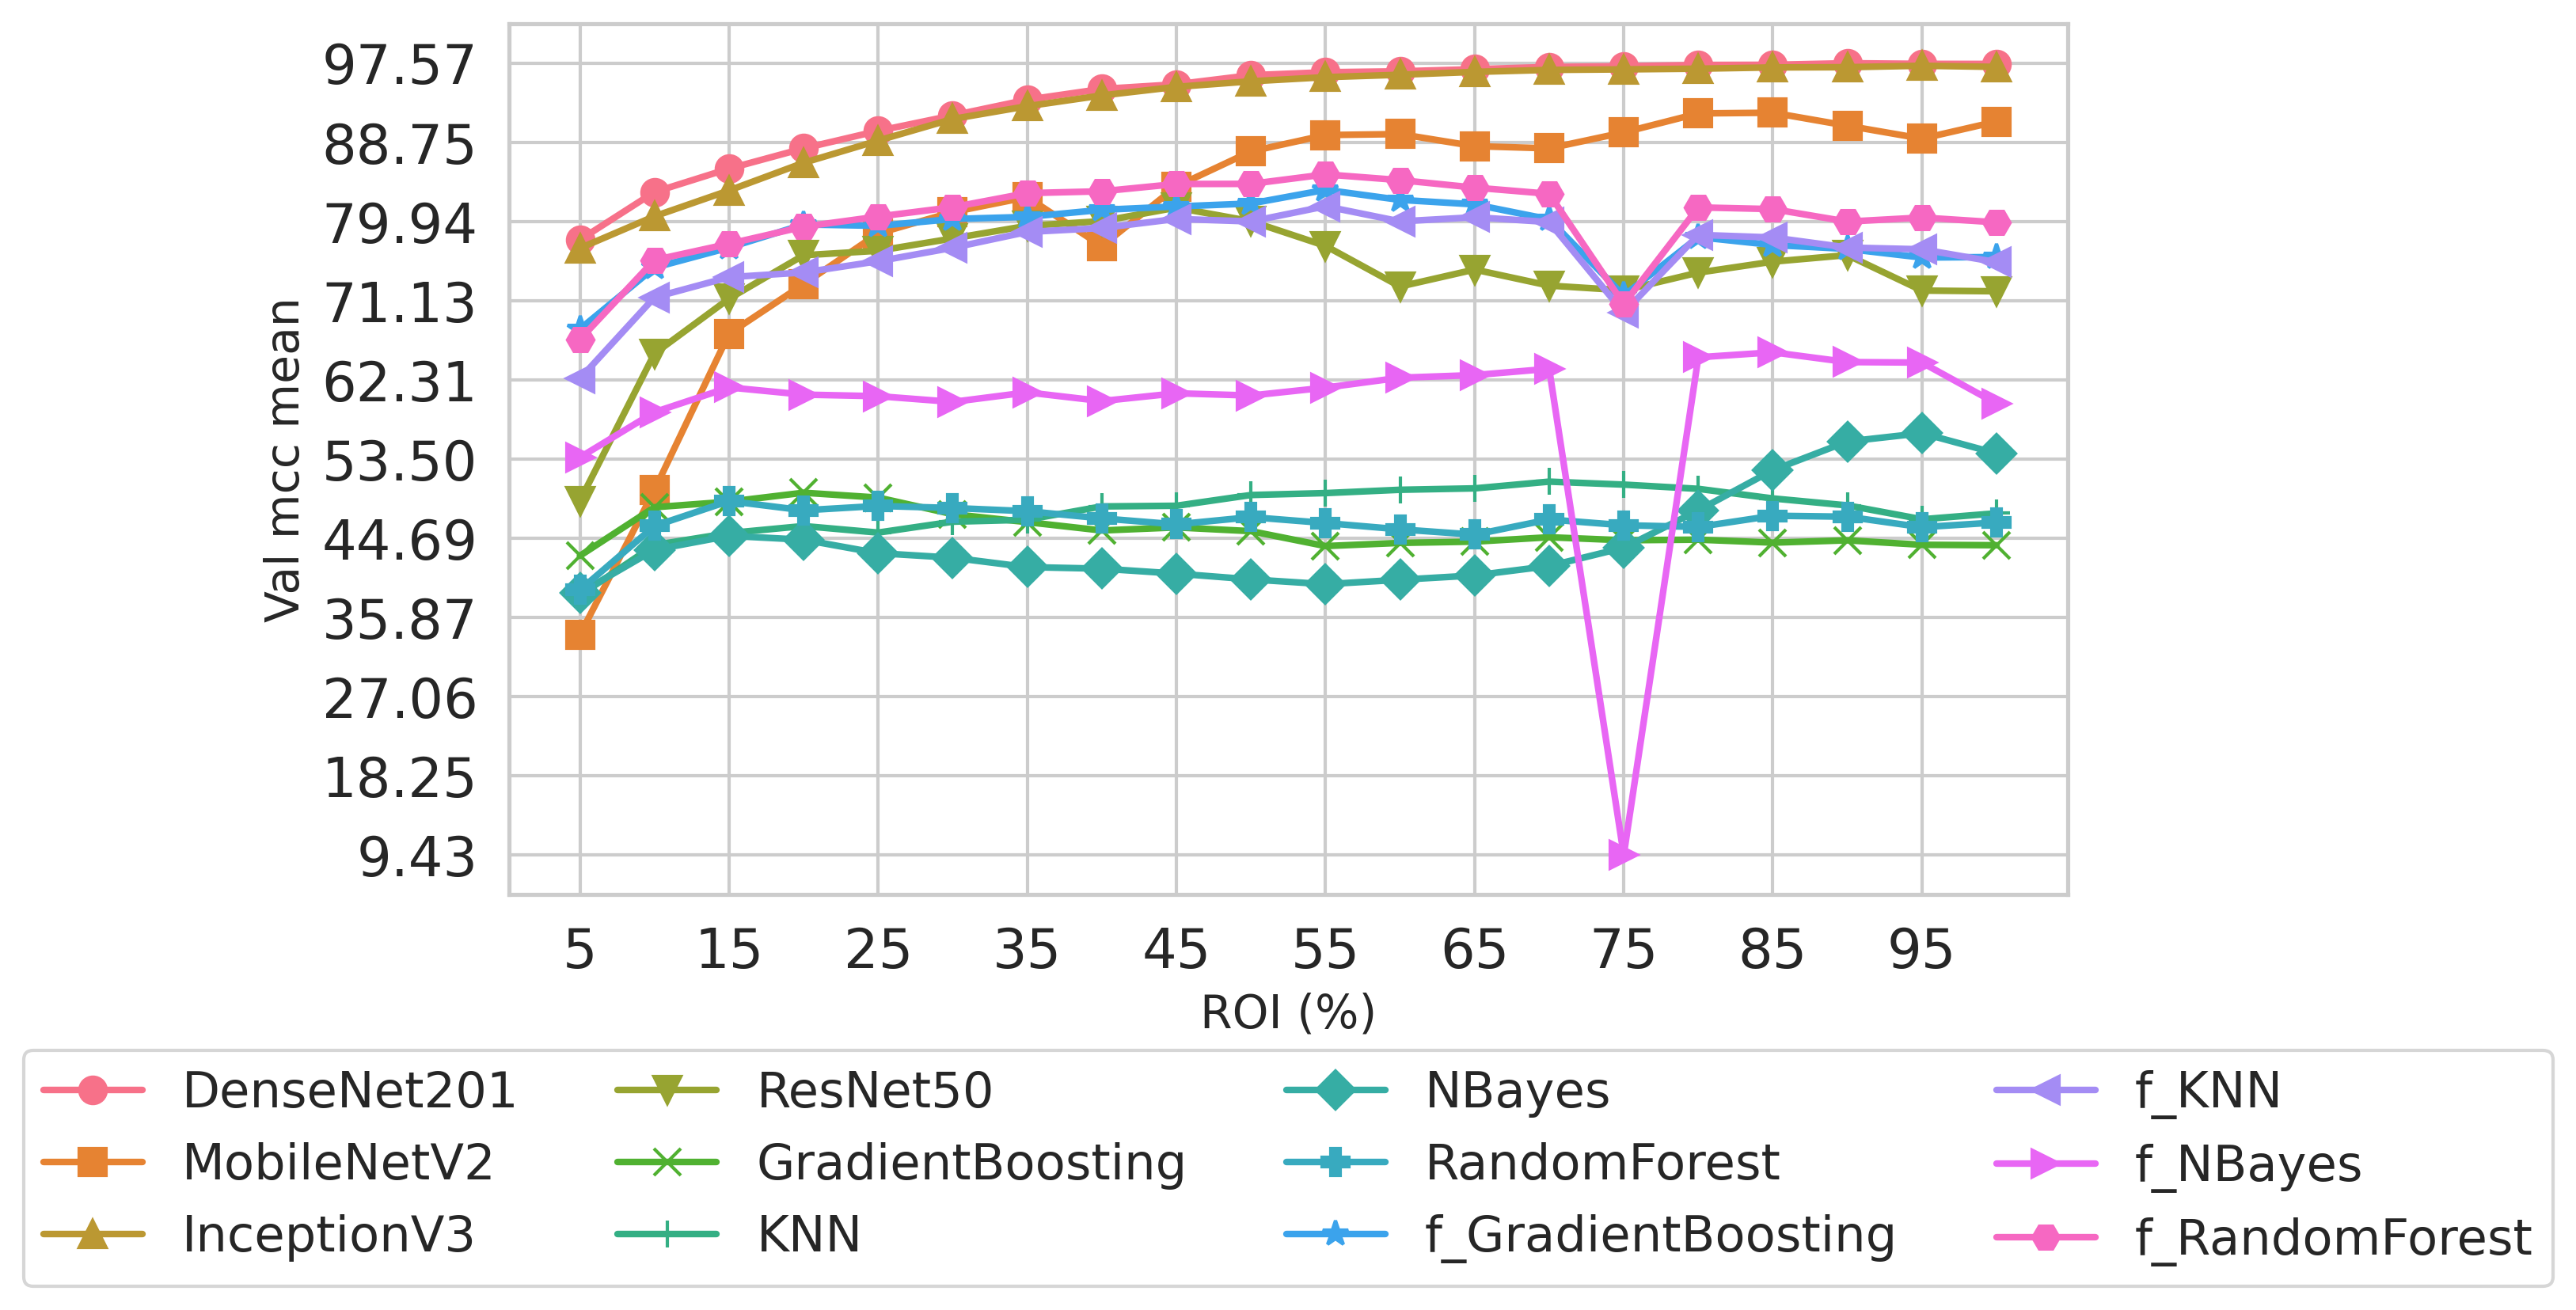

In [15]:
plot_comparison(main_pd, 'val_mcc_mean', '', 'ROI (%)', range_rois)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

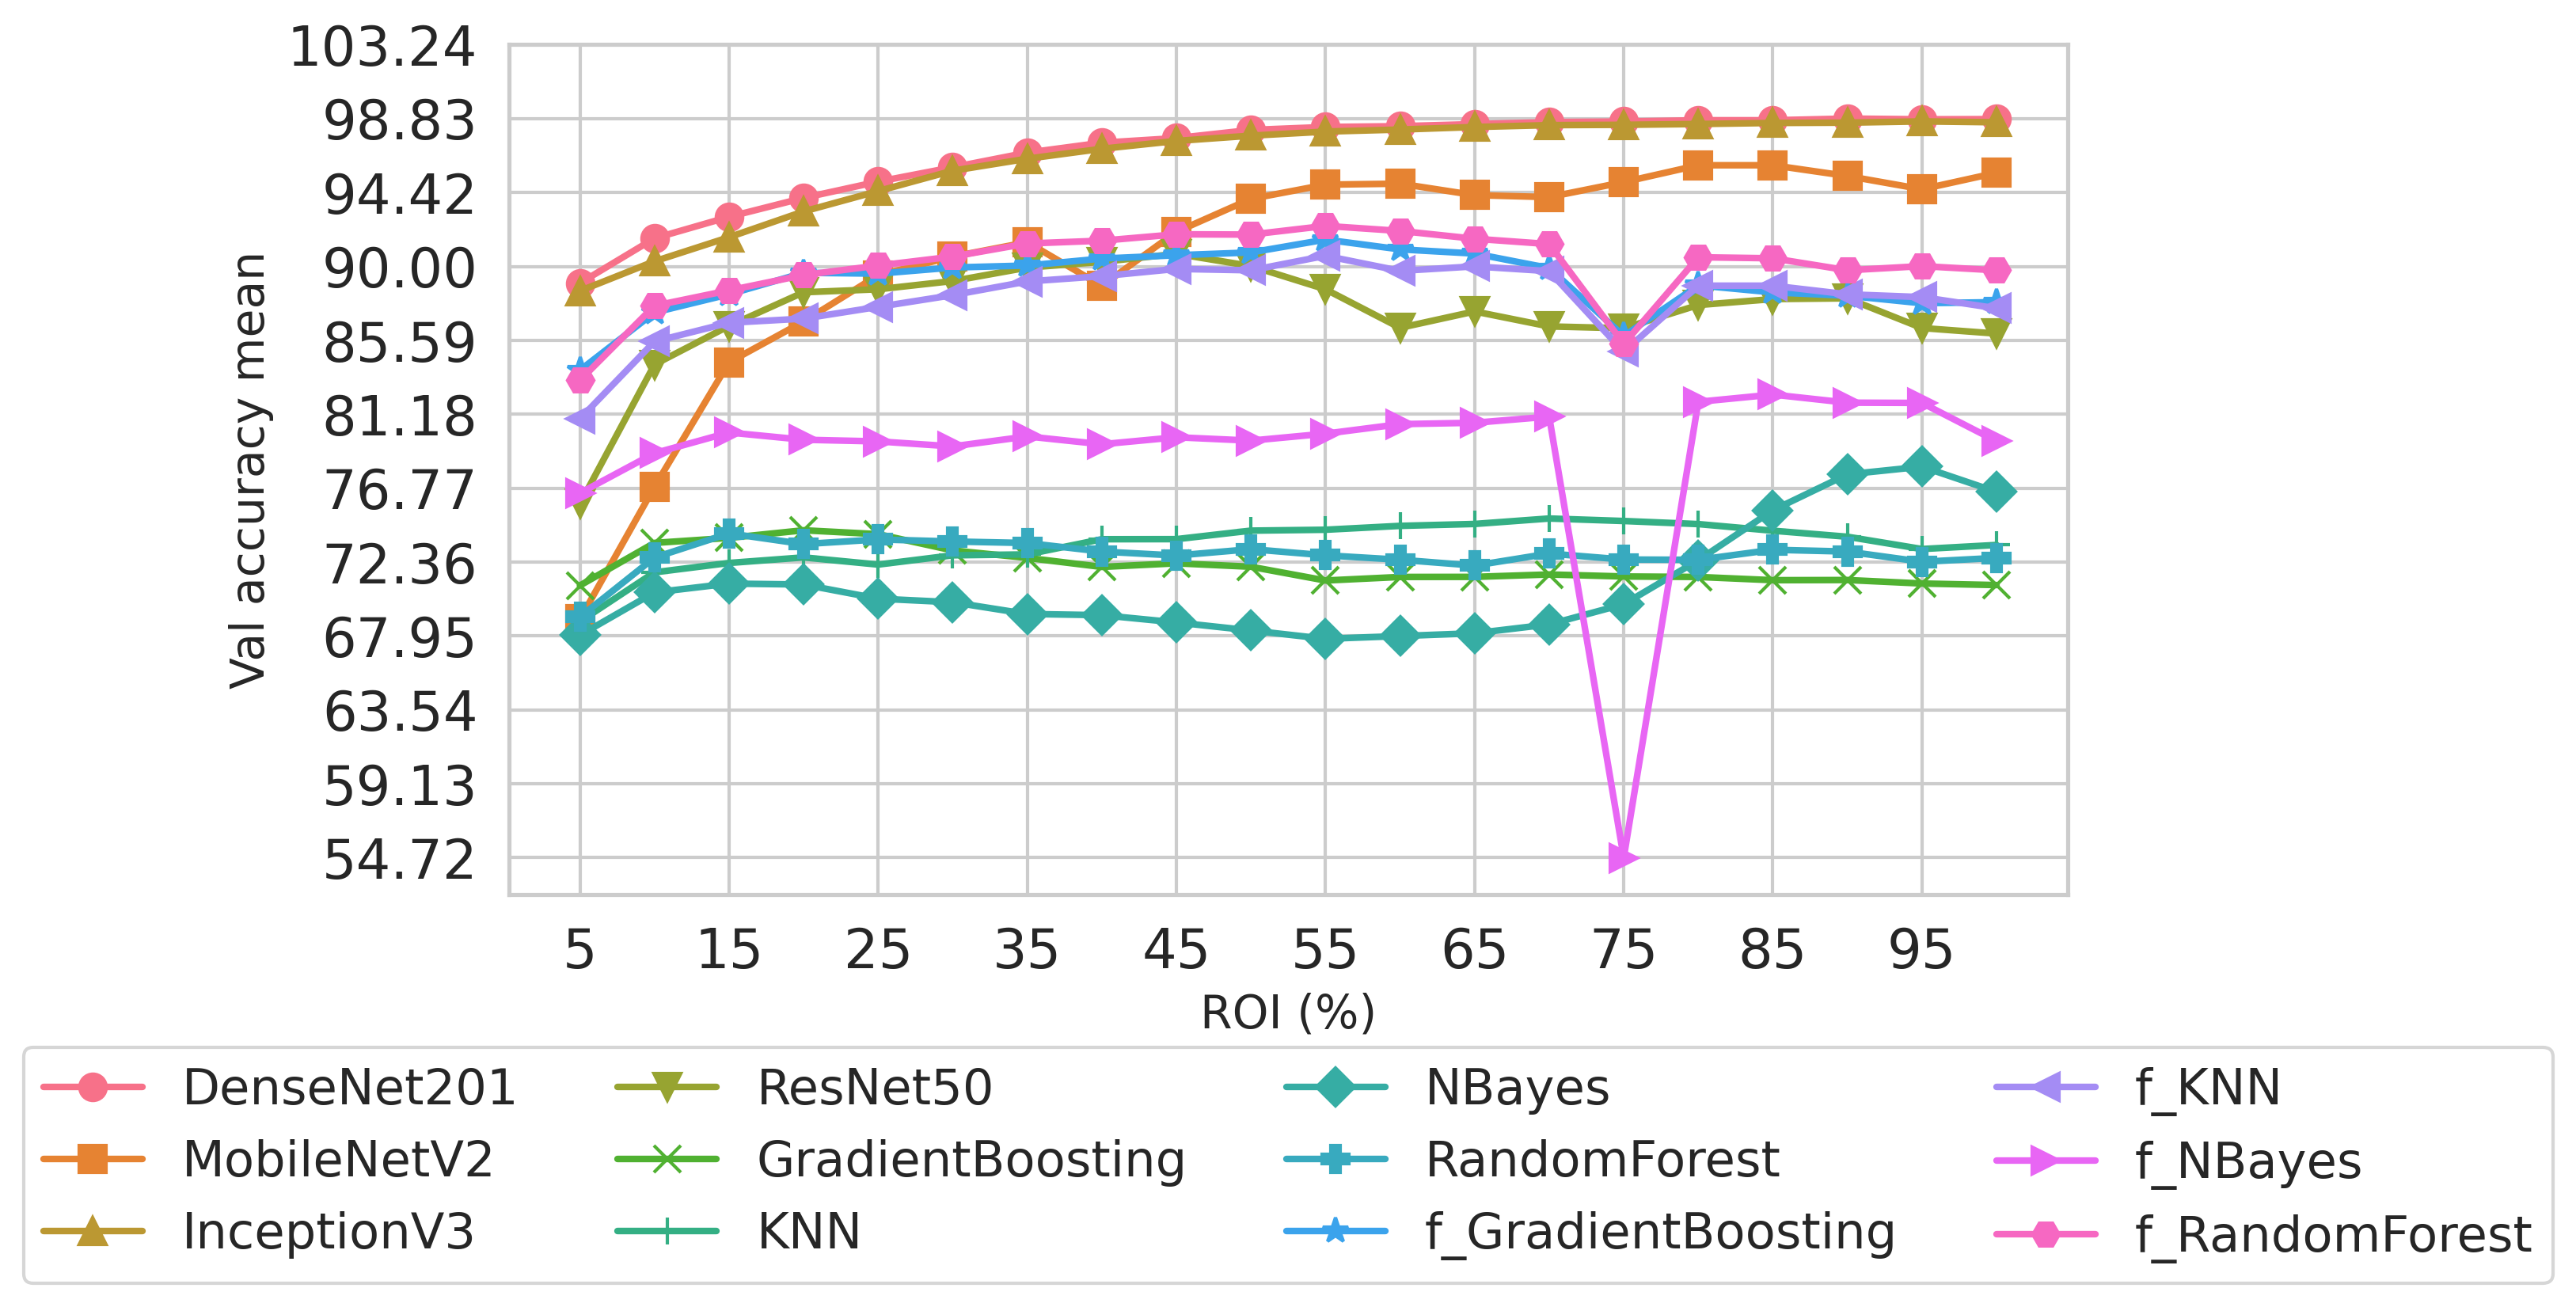

In [16]:
plot_comparison(main_pd, 'val_accuracy_mean', '', 'ROI (%)', range_rois)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

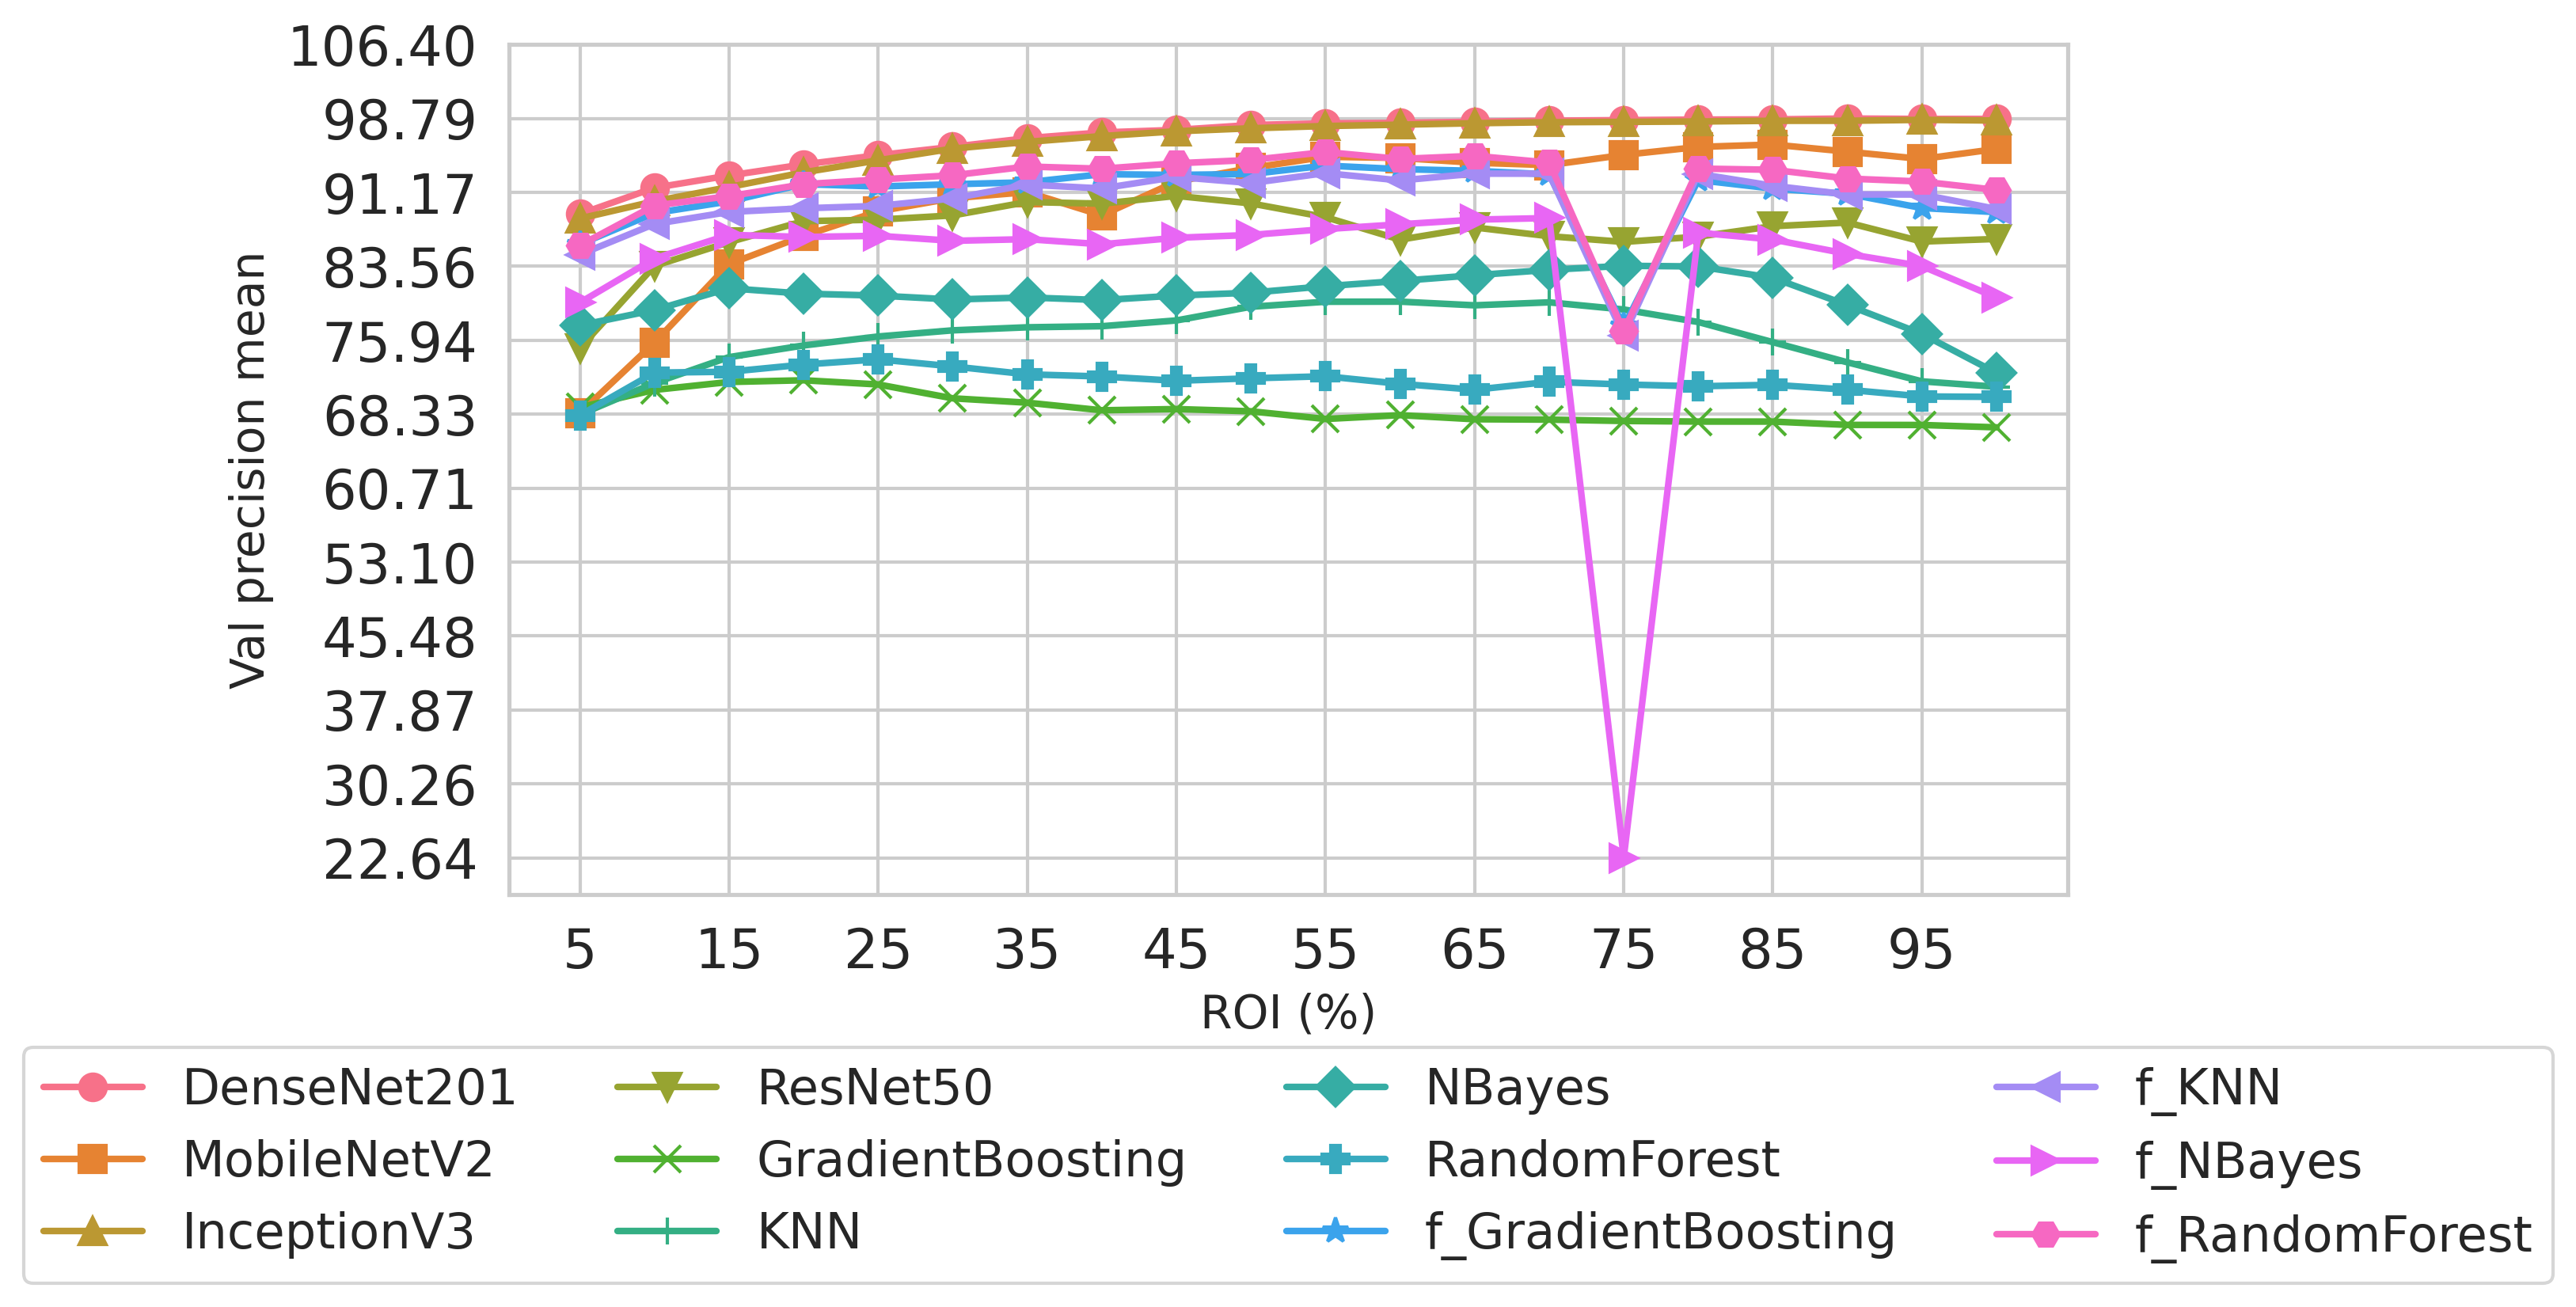

In [17]:
plot_comparison(main_pd, 'val_precision_mean', '', 'ROI (%)', range_rois)

In [18]:
import os
# make grid with all plots saved

files = os.listdir(results_path / 'analitycs' / 'by_train' / 'graphics')

# filter only generate
files = [f for f in files if f.startswith(pre_name)]

print(files)



['ml_dl_f_total_runtime.pdf', 'ml_dl_f_val_accuracy_mean.pdf', 'ml_dl_f_val_auc_mean.pdf', 'ml_dl_f_val_f1_score_mean.pdf', 'ml_dl_f_val_mcc_mean.pdf', 'ml_dl_f_val_precision_mean.pdf', 'ml_dl_f_val_runtime.pdf', 'ml_dl_f_val_sensitivity_mean.pdf', 'ml_dl_f_val_specificity_mean.pdf']


In [19]:
# Tempo mínimo de treinamento
min_train_time = main_pd.groupby('model')['total_runtime'].min().round(3)
# Tempo mínimo de validação
min_val_time = main_pd.groupby('model')['val_runtime'].min().round(3)

# Média geral de tempo de treinamento e validação
avg_train_time = main_pd['total_runtime'].mean().round(3)
avg_val_time = main_pd['val_runtime'].mean().round(3)

time_comparison = pd.concat([train_time, val_time, min_train_time, min_val_time], axis=1)
time_comparison.columns = ['Tempo médio de treinamento (s)', 'Tempo médio de validação (s)', 
                           'Tempo mínimo de treinamento (s)', 'Tempo mínimo de validação (s)']

# Adicionar a média geral à tabela
time_comparison.loc['Média Geral'] = [avg_train_time, avg_val_time, min_train_time.min(), min_val_time.min()]

# plotar tabela
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl", n_colors=2)
sns.heatmap(time_comparison, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title('Comparação dos tempos de treinamento e validação')
plt.tight_layout()
plt.show()


NameError: name 'train_time' is not defined